In [1]:
import torch
import snntorch as snn
from snntorch import spikeplot as splt
import matplotlib.pyplot as plt
import random

In [2]:
torch.manual_seed(42)

In [8]:
x = torch.zeros((200,))
for idx in range(10, 200, 20):
    x[idx] += 1

In [13]:
lif = snn.Leaky(beta=0.7)
mem = lif.init_leaky()

In [14]:
spk_rec = []
mem_rec = []
for step in range(x.size(0)):
    spk, mem = lif(x[step], mem)
    spk_rec.append(spk)
    mem_rec.append(mem)

In [15]:
#@title Plotting Settings
def plot_cur_mem_spk(cur, mem, spk, thr_line=False, vline=False, title=False, ylim_max1=1.25, ylim_max2=1.25):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input current
  ax[0].plot(cur, c="tab:orange")
  ax[0].set_ylim([0, ylim_max1])
  ax[0].set_xlim([0, 200])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  if title:
    ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, ylim_max2]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  if thr_line:
    ax[1].axhline(y=thr_line, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk, ax[2], s=400, c="black", marker="|")
  if vline:
    ax[2].axvline(x=vline, ymin=0, ymax=6.75, alpha = 0.15, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()

def plot_snn_spikes(spk_in, spk1_rec, spk2_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,7), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input spikes
  splt.raster(spk_in[:,0], ax[0], s=0.03, c="black")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)

  # Plot hidden layer spikes
  splt.raster(spk1_rec.reshape(num_steps, -1), ax[1], s = 0.05, c="black")
  ax[1].set_ylabel("Hidden Layer")

  # Plot output spikes
  splt.raster(spk2_rec.reshape(num_steps, -1), ax[2], c="black", marker="|")
  ax[2].set_ylabel("Output Spikes")
  ax[2].set_ylim([0, 10])

  plt.show()

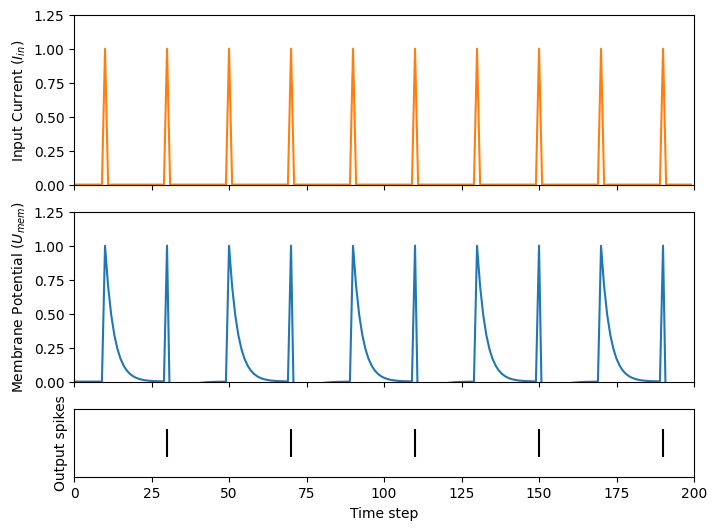

In [16]:
plot_cur_mem_spk(x, torch.stack(mem_rec), torch.stack(spk_rec))

In [54]:
lif1 = snn.Leaky(beta=0.85)
lif2 = snn.Leaky(beta=0.85)

mem1 = lif1.init_leaky()
mem2 = lif2.init_leaky()

cur_in = torch.zeros((200,))
for spike_idx in range(10, 200, 15):
    cur_in[spike_idx] += 1

retro = True

spk1_rec = []
spk2_rec = []
mem1_rec = []
mem2_rec = []
retro_spk = torch.zeros(1)
for idx, step in enumerate(range(cur_in.size(0))):
    if retro:
        spk1, mem1 = lif1(cur_in[step]+retro_spk, mem1)
        if retro_spk == 1:
            print(idx, cur_in[step])
    else:
        spk1, mem1 = lif1(cur_in[step], mem1)
    spk2, mem2 = lif2(spk1, mem2)
    retro_spk = spk2 # buffering spk2
    spk1_rec.append(spk1)
    spk2_rec.append(spk2)
    mem1_rec.append(mem1)
    mem2_rec.append(mem2)

56 tensor(0.)
101 tensor(0.)
146 tensor(0.)
191 tensor(0.)


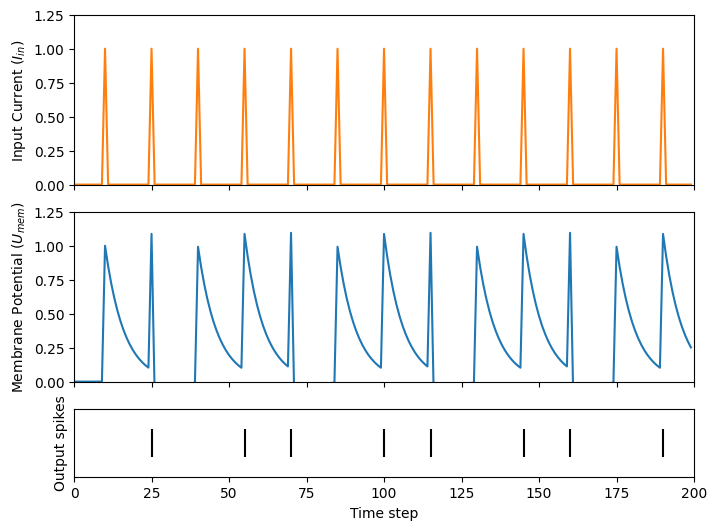

In [55]:
plot_cur_mem_spk(cur_in, torch.stack(mem1_rec), torch.stack(spk1_rec))

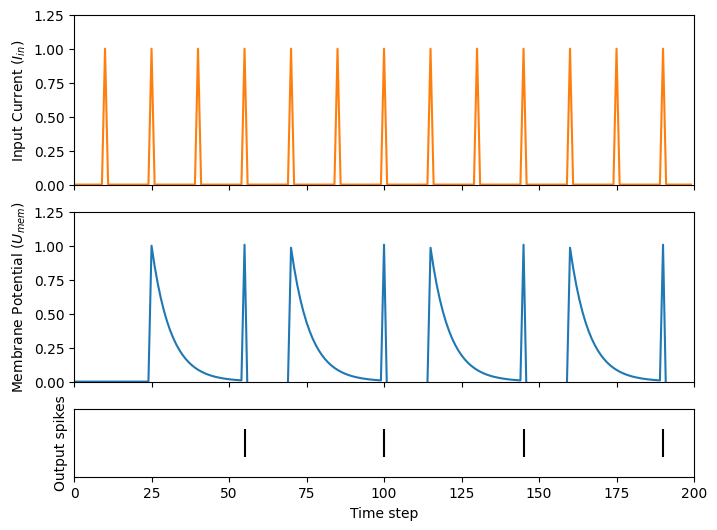

In [56]:
plot_cur_mem_spk(cur_in, torch.stack(mem2_rec), torch.stack(spk2_rec))